In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot.estimators
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import binarize
from xgboost.sklearn import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
import lightgbm as lgb
from datetime import date

%matplotlib inline

from sklearn import linear_model
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.tools import eval_measures
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [100]:
data = pd.read_csv("cardio_train.csv", sep=';')

In [101]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Modelo base de regresión Logistica, sin cambio de variables ni limpieza

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueError: Only 'sa

Accuracy en test = 0.6917142857142857
Recall en test = 0.6687346703217429


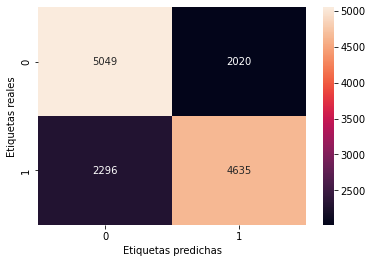

In [102]:
X = data.drop(["cardio", "id"], axis=1)
y = data["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

logistic_regression = LogisticRegression()
folds=StratifiedKFold(n_splits=5, random_state=12, shuffle=True)
params_reg_log = {'C': [1, 10, 100, 1000],
                    'penalty': ['l1', 'l2', 'elasticnet'],
                     'solver': ['saga','newton-cg', 'lbfgs', 'liblinear', 'sag']}

rs_reg_log = RandomizedSearchCV(estimator=logistic_regression, param_distributions=params_reg_log, scoring='recall', cv=folds, n_jobs=4, random_state=12)

rs_reg_log.fit(X_train, y_train)

y_pred_reg_log = rs_reg_log.predict(X_test)

# Graficamos la matriz de confusión en train 
sns.heatmap(confusion_matrix(y_test, y_pred_reg_log), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

print('Accuracy en test =', accuracy_score(y_test, y_pred_reg_log))
print('Recall en test =', recall_score(y_test, y_pred_reg_log))

# Descriptiva

In [103]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

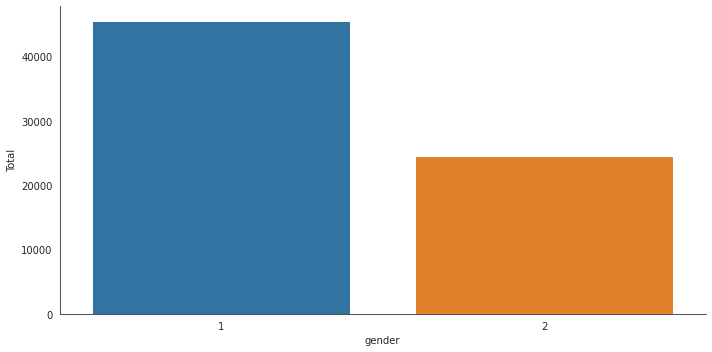

In [104]:
with sns.axes_style('white'):
    g = sns.catplot(x = "gender", data=data, aspect=2.0, kind='count')
    g.set_ylabels('Total')

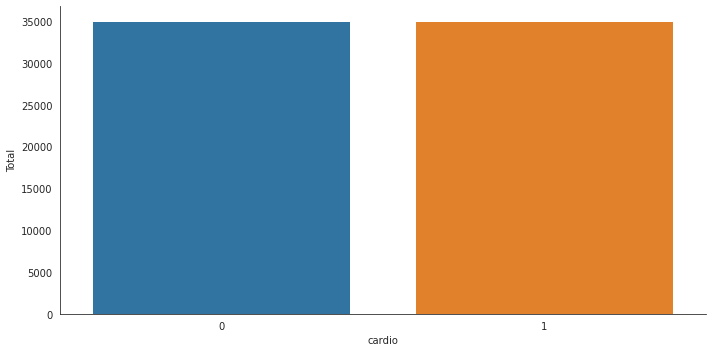

In [105]:
with sns.axes_style('white'):
    g = sns.catplot(x = "cardio", data=data, aspect=2.0, kind='count')
    g.set_ylabels('Total')

In [106]:
data.value_counts("cardio")

#hay balance de clases

cardio
0    35021
1    34979
dtype: int64

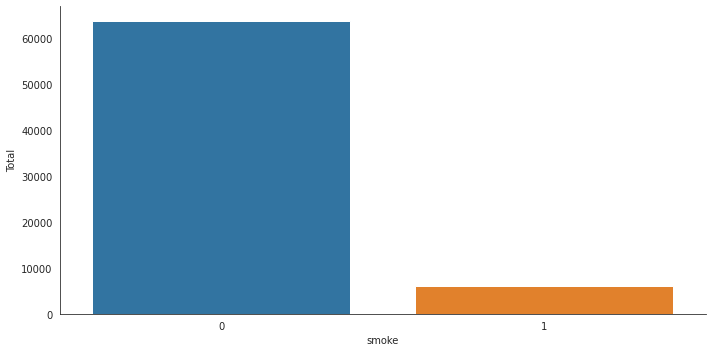

In [107]:
with sns.axes_style('white'):
    g = sns.catplot(x = "smoke", data=data, aspect=2.0, kind='count')
    g.set_ylabels('Total')

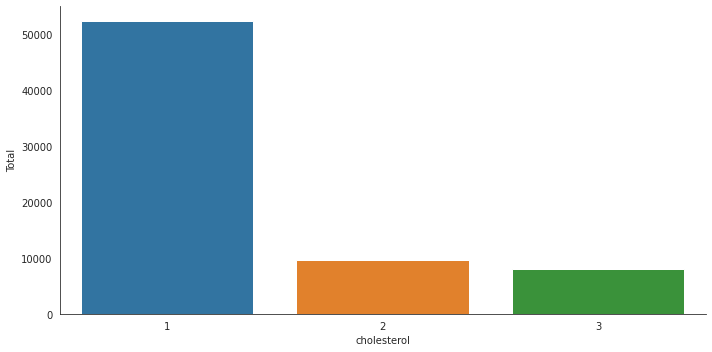

In [108]:
with sns.axes_style('white'):
    g = sns.catplot(x = "cholesterol", data=data, aspect=2.0, kind='count')
    g.set_ylabels('Total')

# Creacion de Variables

In [109]:
data["IMC"] = round((data.weight)/((data.height)**2)*10000, 1)

In [110]:
def clas_IMC (i):
    if i < 18.5:
        return "Bajo peso"
    elif (i >= 18.5 and i < 30):
        return "Normal"
    elif (i >= 30 and i < 35):
        return "Obesidad Moderada"
    elif (i >= 35 and i < 40):
        return "Obesidad Severa"
    else:
        return "Obesidad Morbida"

In [111]:
data["clas_IMC"] = data.IMC.apply(clas_IMC)

In [112]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,clas_IMC
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,Obesidad Moderada
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5,Normal
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7,Normal
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.9,Normal
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.5,Obesidad Morbida
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.4,Obesidad Moderada
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.1,Normal


In [113]:
def clas_nivel_IMC (i):
    if i < 18.5:
        return -1
    elif (i >= 18.5 and i < 30):
        return 0
    elif (i >= 30 and i < 35):
        return 1
    elif (i >= 35 and i < 40):
        return 2
    else:
        return 3

In [114]:
data["clas_nivel_IMC"] = (data.IMC.apply(clas_nivel_IMC))

In [115]:
data.value_counts("clas_IMC")

clas_IMC
Normal               50762
Obesidad Moderada    12302
Obesidad Severa       4402
Obesidad Morbida      1905
Bajo peso              629
dtype: int64

In [116]:
data.value_counts("clas_nivel_IMC")

clas_nivel_IMC
 0    50762
 1    12302
 2     4402
 3     1905
-1      629
dtype: int64

In [117]:
def grado_presion (i, j):
    if (i<=120 and j<=80):
        return "Normal"
    elif ((i>120 or j>80) and (i<140 or j<90)):
        return "Elevado"
    elif (i>=140 or j>=90) and (i<=180 or j<=120):
        return "Hipertension"
    elif (i>=180 and j>=120):
        return "Crisis"

In [118]:
data["grado_presion"] = data.apply(lambda x: grado_presion(x.ap_hi, x.ap_lo), axis=1)

In [119]:
def grado_nivel_presion (i, j):
    if (i<=120 and j<=80):
        return 0
    elif ((i>120 or j>80) and (i<140 or j<90)):
        return 1
    elif (i>=140 or j>=90) and (i<=180 or j<=120):
        return 2
    elif (i>=180 and j>=120):
        return 3

In [120]:
data["grado_nivel_presion"] = data.apply(lambda x: grado_nivel_presion(x.ap_hi, x.ap_lo), axis=1)

In [121]:
data["age_years"] = data.age/365

In [122]:
data["age_years"] = data["age_years"].apply(int)

In [123]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,clas_IMC,clas_nivel_IMC,grado_presion,grado_nivel_presion,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal,0,Normal,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,Obesidad Moderada,1,Hipertension,2,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5,Normal,0,Elevado,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7,Normal,0,Hipertension,2,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal,0,Normal,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.9,Normal,0,Normal,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.5,Obesidad Morbida,3,Hipertension,2,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.4,Obesidad Moderada,1,Hipertension,2,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.1,Normal,0,Elevado,1,61


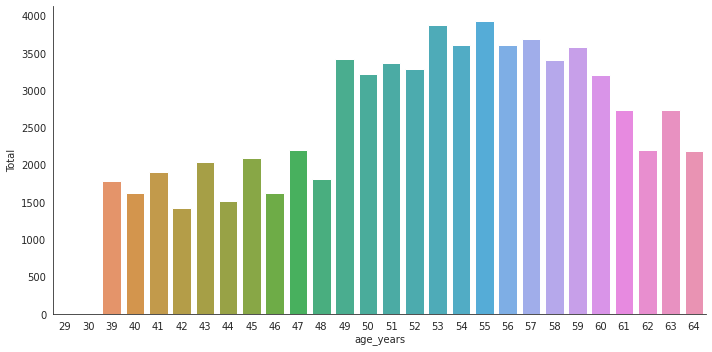

In [124]:
with sns.axes_style('white'):
    g = sns.catplot(x = "age_years", data=data, aspect=2.0, kind='count')
    g.set_ylabels('Total')

# TRAIN TEST con Variables nuevas

In [125]:
X = data.drop(["cardio", "id", 'clas_IMC', "grado_presion"], axis=1)
y = data["cardio"]



In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [127]:
logistic_regression = LogisticRegression()
folds=StratifiedKFold(n_splits=5, random_state=12, shuffle=True)
params_reg_log = {'C': [1, 10, 100, 1000],
                    'penalty': ['l1', 'l2', 'elasticnet'],
                     'solver': ['saga','newton-cg', 'lbfgs', 'liblinear', 'sag']}

rs_reg_log = RandomizedSearchCV(estimator=logistic_regression, param_distributions=params_reg_log, scoring='recall', cv=folds, n_jobs=4, random_state=12)

In [128]:
rs_reg_log.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueError: Only 'sa

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
                   estimator=LogisticRegression(), n_jobs=4,
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['saga', 'newton-cg', 'lbfgs',
                                                   'liblinear', 'sag']},
                   random_state=12, scoring='recall')

In [129]:
pd.DataFrame(rs_reg_log.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_penalty,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013567,0.002333,0.000000,0.000000,liblinear,elasticnet,1000,"{'solver': 'liblinear', 'penalty': 'elasticnet...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.018204,0.006019,0.000000,0.000000,saga,elasticnet,1000,"{'solver': 'saga', 'penalty': 'elasticnet', 'C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,9.667179,0.464441,0.027294,0.008342,saga,l1,1000,"{'solver': 'saga', 'penalty': 'l1', 'C': 1000}",0.682175,0.678966,0.681640,0.697629,0.677839,0.683650,0.007174,1
3,2.345957,0.854372,0.021861,0.008170,liblinear,l2,1,"{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}",0.660784,0.666845,0.663636,0.679265,0.658763,0.665859,0.007235,5
4,0.015590,0.001984,0.000000,0.000000,newton-cg,elasticnet,10,"{'solver': 'newton-cg', 'penalty': 'elasticnet...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


In [130]:
print('El mejor estimador es', rs_reg_log.best_estimator_)
print('El mejor score de recall obtenido es de ', rs_reg_log.best_score_)
print('Los mejores parámetros para el modelo son ', rs_reg_log.best_params_)

El mejor estimador es LogisticRegression(C=1000, penalty='l1', solver='saga')
El mejor score de recall obtenido es de  0.6836497493047367
Los mejores parámetros para el modelo son  {'solver': 'saga', 'penalty': 'l1', 'C': 1000}


Accuracy en train = 0.6905178571428572
Recall en train = 0.6786223616657159


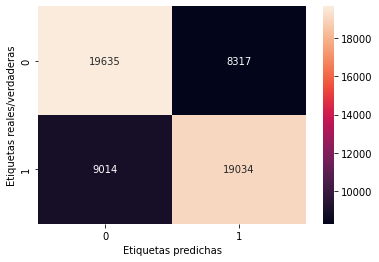

In [131]:
y_pred_reg_log_train = rs_reg_log.predict(X_train)

# Graficamos la matriz de confusión en train 
sns.heatmap(confusion_matrix(y_train, y_pred_reg_log_train), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales/verdaderas')
plt.xlabel('Etiquetas predichas');

print('Accuracy en train =', accuracy_score(y_train, y_pred_reg_log_train))
print('Recall en train =', recall_score(y_train, y_pred_reg_log_train))

Accuracy en test = 0.6920714285714286
Recall en test = 0.6719088154667436


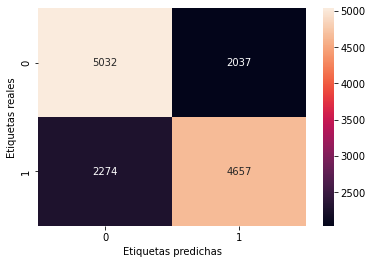

In [132]:
y_pred_reg_log = rs_reg_log.predict(X_test)

# Graficamos la matriz de confusión en train 
sns.heatmap(confusion_matrix(y_test, y_pred_reg_log), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

print('Accuracy en test =', accuracy_score(y_test, y_pred_reg_log))
print('Recall en test =', recall_score(y_test, y_pred_reg_log))

## TRAIN TEST con Variables nuevas, y creación de Dummies

In [133]:
# #Dummies: crear las dummies con estos codigos comentados solo resta en la performance del modelo

# #Creación de una dummie para "clas_IMC", "grado_presion".

# categoricals = ["clas_IMC", "grado_presion"]
# X_categ = data[categoricals]

# # #instanciar en el OneHotEncoder
# one_enc = OneHotEncoder(drop = 'first')

# # #fiteamos con X_categ (esto lo que hace es aprender todas las categorías posibles)
# one_enc.fit(X_categ)
# one_enc.categories_

In [134]:
# #Generamos el dataframe de dummies
# dummies = one_enc.transform(X_categ).toarray()
# dummies_df = pd.DataFrame(dummies)
# dummies_df

In [135]:

# # #Generamos los nombres de las columnas para despues ponerlos en el datadrame
# colum_names = [categoricals[i] + '_' + one_enc.categories_[i] for i in range(len(categoricals)) ]
# col_names_drop_first = [sublist[i] for sublist in colum_names for i in range(len(sublist)) if i != 0]

# # #Renombramos las columnas en el dataframe de dummies
# dummies_df.columns = col_names_drop_first
# dummies_df

In [136]:
# data = pd.concat([data, dummies_df], axis=1)
# data.head(5)

In [137]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,clas_IMC,clas_nivel_IMC,grado_presion,grado_nivel_presion,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal,0,Normal,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,Obesidad Moderada,1,Hipertension,2,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5,Normal,0,Elevado,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7,Normal,0,Hipertension,2,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal,0,Normal,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.9,Normal,0,Normal,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.5,Obesidad Morbida,3,Hipertension,2,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.4,Obesidad Moderada,1,Hipertension,2,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.1,Normal,0,Elevado,1,61


In [138]:
X = data.drop(["cardio", "id", 'clas_IMC', "grado_presion", "age"], axis=1)
y = data["cardio"]


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueError: Only 'sa

Accuracy en test = 0.7177857142857142
Recall en test = 0.6521425479728755


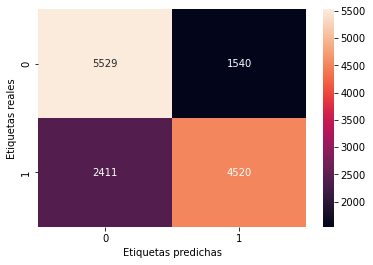

In [140]:
logistic_regression = LogisticRegression()
folds=StratifiedKFold(n_splits=5, random_state=12, shuffle=True)
params_reg_log = {'C': [1, 10, 100, 1000],
                    'penalty': ['l1', 'l2', 'elasticnet'],
                     'solver': ['saga','newton-cg', 'lbfgs', 'liblinear', 'sag']}

rs_reg_log = RandomizedSearchCV(estimator=logistic_regression, param_distributions=params_reg_log, scoring='recall', cv=folds, n_jobs=4, random_state=12)
rs_reg_log.fit(X_train, y_train)

y_pred_reg_log = rs_reg_log.predict(X_test)

# Graficamos la matriz de confusión en train 
sns.heatmap(confusion_matrix(y_test, y_pred_reg_log), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

print('Accuracy en test =', accuracy_score(y_test, y_pred_reg_log))
print('Recall en test =', recall_score(y_test, y_pred_reg_log))

In [141]:
print('El mejor estimador es', rs_reg_log.best_estimator_)
print('El mejor score de recall obtenido es de ', rs_reg_log.best_score_)
print('Los mejores parámetros para el modelo son ', rs_reg_log.best_params_)

El mejor estimador es LogisticRegression(C=1)
El mejor score de recall obtenido es de  0.6669995731967563
Los mejores parámetros para el modelo son  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}


## Dropear los que estan en niveles y solo probar dummies

In [142]:
X = data.drop(["cardio", "id", 'clas_IMC', "grado_presion", "grado_nivel_presion", "clas_nivel_IMC", "age"], axis=1)
y = data["cardio"]

In [143]:
X

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,IMC,age_years
0,2,168,62.0,110,80,1,1,0,0,1,22.0,50
1,1,156,85.0,140,90,3,1,0,0,1,34.9,55
2,1,165,64.0,130,70,3,1,0,0,0,23.5,51
3,2,169,82.0,150,100,1,1,0,0,1,28.7,48
4,1,156,56.0,100,60,1,1,0,0,0,23.0,47
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,26.9,52
69996,1,158,126.0,140,90,2,2,0,0,1,50.5,61
69997,2,183,105.0,180,90,3,1,0,1,0,31.4,52
69998,1,163,72.0,135,80,1,2,0,0,0,27.1,61


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 457, in _check_solver
    raise ValueError(
ValueError: Only 'sa

Accuracy en test = 0.7202857142857143
Recall en test = 0.6698889049199249


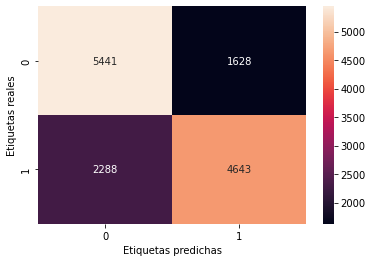

In [145]:
logistic_regression = LogisticRegression()
folds=StratifiedKFold(n_splits=5, random_state=12, shuffle=True)
params_reg_log = {'C': [1, 10, 100, 1000],
                    'penalty': ['l1', 'l2', 'elasticnet'],
                     'solver': ['saga','newton-cg', 'lbfgs', 'liblinear', 'sag']}

rs_reg_log = RandomizedSearchCV(estimator=logistic_regression, param_distributions=params_reg_log, scoring='recall', cv=folds, n_jobs=4, random_state=12)

modelo_produccion = rs_reg_log.fit(X_train, y_train)

y_pred_reg_log = rs_reg_log.predict(X_test)

# Graficamos la matriz de confusión en train 
sns.heatmap(confusion_matrix(y_test, y_pred_reg_log), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

print('Accuracy en test =', accuracy_score(y_test, y_pred_reg_log))
print('Recall en test =', recall_score(y_test, y_pred_reg_log))

In [146]:
print(f1_score(y_test, y_pred_reg_log))

0.703378276018785


In [147]:
confusion = confusion_matrix(y_test, y_pred_reg_log)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

tasa_de_negativos = FN /(FN + TP)
print(tasa_de_negativos)

0.330111095080075


In [149]:
import pickle

# Grabamos el modelo en el directorio
pkl_filename = "cardio_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(modelo_produccion, file)

#modelo elegido para producción: regresión logistica sin dummies y sin las variables creadas excepto IMC

# Regresión con cambio de Umbral

In [150]:
y_pred_proba = rs_reg_log.predict_proba(X_test)
y_pred_proba #probabilidad de cero y de 1 

array([[0.78413968, 0.21586032],
       [0.75278471, 0.24721529],
       [0.5946712 , 0.4053288 ],
       ...,
       [0.08455033, 0.91544967],
       [0.77598794, 0.22401206],
       [0.46647615, 0.53352385]])

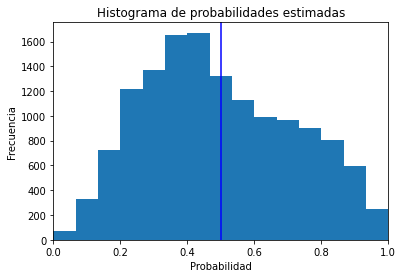

In [151]:
y_probs_logit_right = y_pred_proba[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_right, bins=15)
plt.axvline(x = 0.5, color = 'b', label = 'axvline - full height') 
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.show()

In [152]:
y_probs_logit_right

array([0.21586032, 0.24721529, 0.4053288 , ..., 0.91544967, 0.22401206,
       0.53352385])

Accuracy en test = 0.6555
Recall en test = 0.8991487519838407


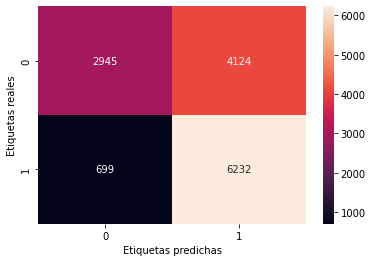

In [153]:
y_pred_logit = (y_probs_logit_right> 0.33).astype(int)

# Graficamos la matriz de confusión en train 
sns.heatmap(confusion_matrix(y_test, y_pred_logit), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')

plt.xlabel('Etiquetas predichas');

print('Accuracy en test =', accuracy_score(y_test, y_pred_logit))
print('Recall en test =', recall_score(y_test, y_pred_logit))

In [154]:
#fn/(fn+vp)
confusion = confusion_matrix(y_test, y_pred_logit)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

tasa_de_negativos = FN /(FN + TP)
print(tasa_de_negativos)

0.10085124801615929


In [156]:
print(f1_score(y_test, y_pred_logit))

0.7210042228264014


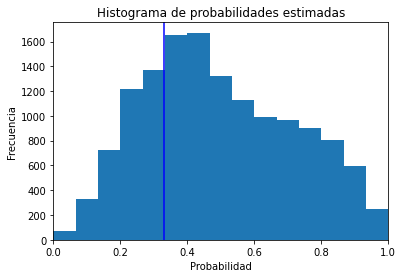

In [157]:

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_right, bins=15)
plt.axvline(x = 0.33, color = 'b', label = 'axvline - full height') 
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.show()

al mover el umbral a 0.42, el modelo tiene mejor rendimiento

# LGBMClassifier

In [158]:
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)
model_lgb = lgb.LGBMClassifier()
params = {  
    "n_estimators": [50,100,500],
    "max_depth": [1,2,3,4], 
    "learning_rate": [0.01, 0.1],
}
grid_lgb = GridSearchCV(model_lgb, param_grid=params, cv=cv, verbose=1, n_jobs=-1)
grid_lgb.fit(X_train,y_train)
grid_lgb.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [159]:
def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

evaluar_rendimiento(grid_lgb.best_estimator_,"Light GBM", X_train, y_train, cv)

Rendimiento de Light GBM:	0.737 ± 0.004


In [160]:
best_model = grid_lgb.best_estimator_
y_pred_lgbm = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lgbm)  
print('accuracy:', accuracy)
classification_rep = classification_report(y_test, y_pred_lgbm)
print('classification_report:', classification_rep)    

accuracy: 0.7332857142857143
classification_report:               precision    recall  f1-score   support

           0       0.72      0.77      0.75      7069
           1       0.75      0.69      0.72      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



Accuracy en test = 0.7332857142857143
Recall en test = 0.692685038234021


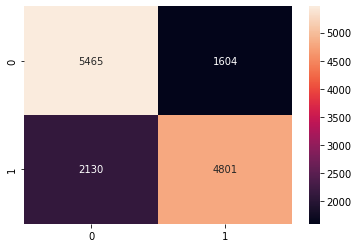

In [161]:
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='.0f')

print('Accuracy en test =', accuracy_score(y_test, y_pred_lgbm))
print('Recall en test =', recall_score(y_test, y_pred_lgbm))

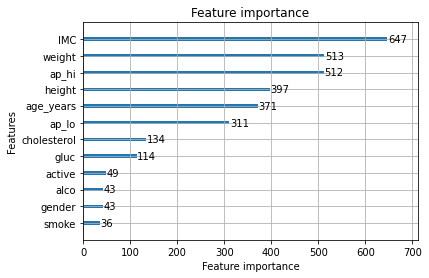

In [162]:
lgb.plot_importance(grid_lgb.best_estimator_, max_num_features=20);

# XG Boosting

In [163]:
model_xg = XGBClassifier(n_jobs=-1, use_label_encoder=False)

# Optimizamos los hiperparametros para XG boost con la misma grilla de hiperparametros antes definida para Light GBM, 
params = {  
    "n_estimators": [50,100,500],     
    "max_depth": [1,2,3,4], 
    "learning_rate": [0.01, 0.1], 
}

xgb = GridSearchCV(model_xg, param_grid=params, cv=cv, verbose=1, n_jobs=-1)

xgb.fit(X_train,y_train)

xgb.best_params_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}

In [164]:
# Evaluamos el rendimiento del estimador optimo, utilizando cross validation.
# También pasando como argumento CV el generador de CV splits creado antes

def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

evaluar_rendimiento(xgb.best_estimator_,"XG Boost", X_train, y_train, cv)

Rendimiento de XG Boost:	0.737 ± 0.004


Accuracy en test = 0.7347142857142858
Recall en test = 0.6913865243110662


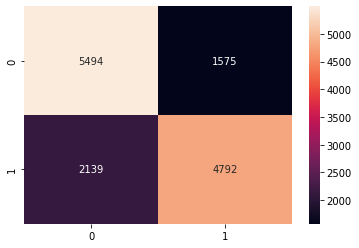

In [165]:
best_model = xgb.best_estimator_



y_pred_xgb = best_model.predict(X_test)


sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='.0f')
print('Accuracy en test =', accuracy_score(y_test, y_pred_xgb))
print('Recall en test =', recall_score(y_test, y_pred_xgb))



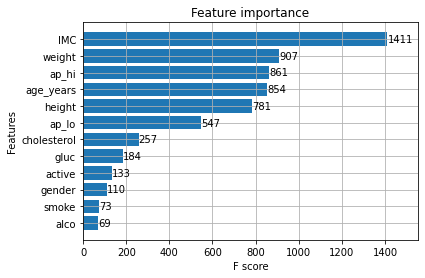

In [166]:
# Features importances
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=15);

# Roc

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

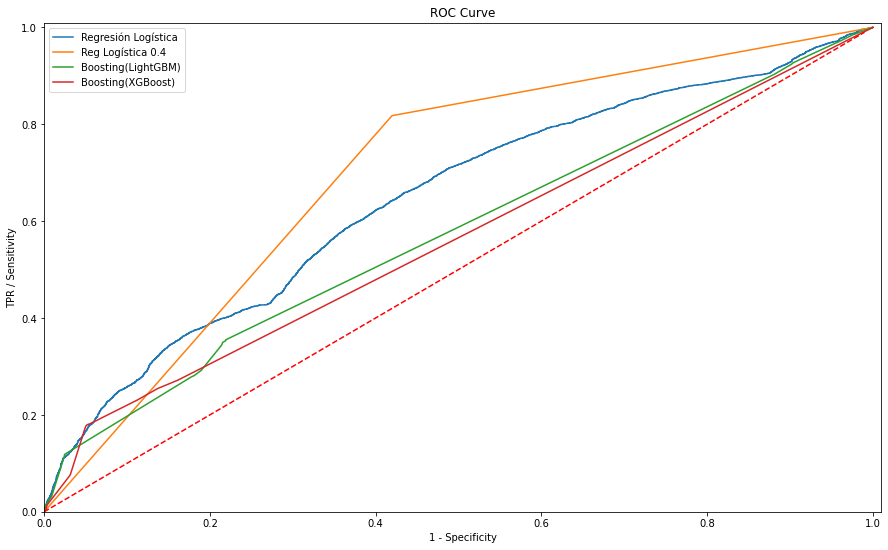

In [168]:
y_pred_proba_reg_log = rs_reg_log.predict_proba(X_test) #lg2: modelo regresión logística entrenado e instanciado previamente
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba_reg_log[:,1])

y_pred_logit = binarize(y_pred_proba, threshold=0.4) #log con umbral 0.4 modelo regresión logística entrenado e instanciado previamente
fpr_lg2,tpr_lg2,thr_lg2 = roc_curve(y_test, y_pred_logit[:,1])

y_pred_proba_BoostingL = grid_lgb.predict_proba(X_test) #model: modelo Boosting(LightGBM) entrenado e instanciado previamente
fpr_BL,tpr_BL,thr_BL = roc_curve(y_test, y_pred_proba_BoostingL[:,1])

y_pred_proba_BoostingX= xgb.predict_proba(X_test) #model: modelo Boosting(XGBoost) entrenado e instanciado previamente
fpr_BX,tpr_BX,thr_BX = roc_curve(y_test, y_pred_proba_BoostingX[:,1])



plt.figure(figsize = (15,9))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificity')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_lg2,tpr_lg2)
plt.plot(fpr_BL,tpr_BL)
plt.plot(fpr_BX,tpr_BX)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01),'--r')
plt.legend(['Regresión Logística', 'Reg Logística 0.4', "Boosting(LightGBM)", "Boosting(XGBoost)"])
plt.show()



In [169]:
print('AUC-RL=', auc(fpr_log,tpr_log))
print('AUC-RL0.4=', auc(fpr_lg2,tpr_lg2))
print('AUC-BL=', auc(fpr_BL,tpr_BL))
print('AUC-BX=', auc(fpr_BX,tpr_BX))

AUC-RL= 0.6448581157038544
AUC-RL0.4= 0.6989569231410424
AUC-BL= 0.5746322413081808
AUC-BX= 0.5619786036761655


# Random Forest

In [170]:
clf = RandomForestClassifier( n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf = clf.fit(X_train,y_train)

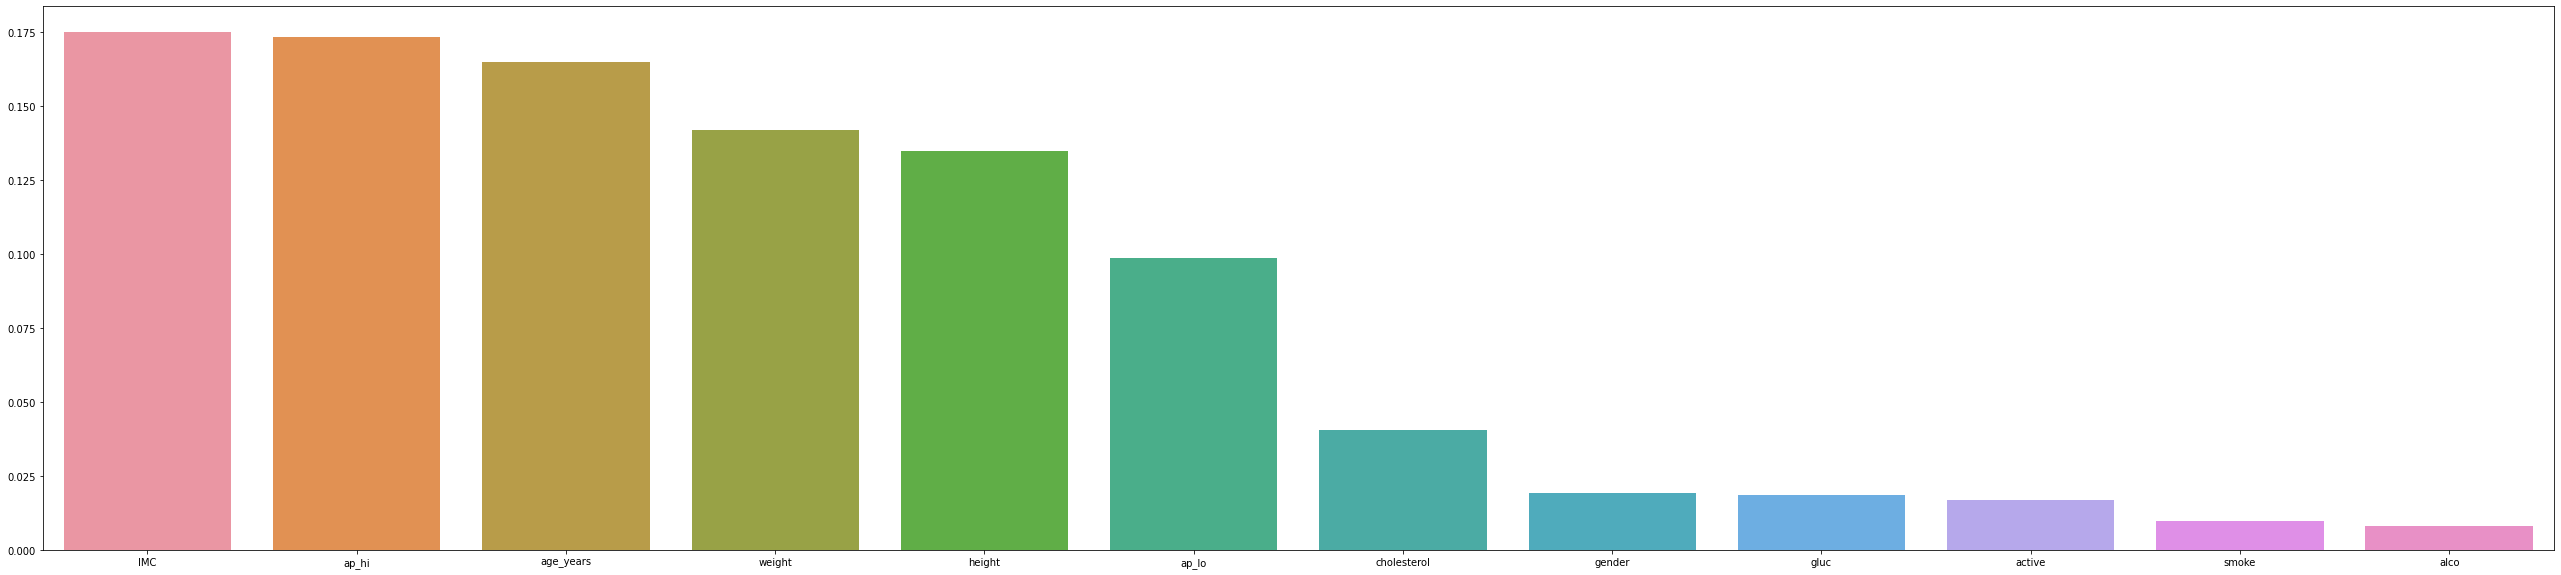

In [171]:
importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (45,10))
sns.barplot(x = columns[indices], y = importances[indices]);

In [172]:
y_train_predF = clf.predict(X_train)
y_test_predF = clf.predict(X_test)
print("Accuracy train: ", accuracy_score(y_train, y_train_predF))
print("Accuracy test: ", accuracy_score(y_test, y_test_predF))
print("Recall train: ", recall_score(y_train, y_train_predF))
print("Recall test: ", recall_score(y_test,y_test_predF))

Accuracy train:  0.9806785714285714
Accuracy test:  0.7082142857142857
Recall train:  0.9740088419851682
Recall test:  0.6961477420285673


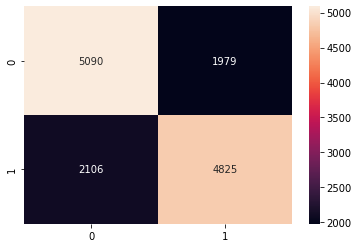

In [173]:
sns.heatmap(confusion_matrix(y_test, y_test_predF), annot=True, fmt='.0f')

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", l

Accuracy en test = 0.7318571428571429
Recall en test = 0.6974462559515221


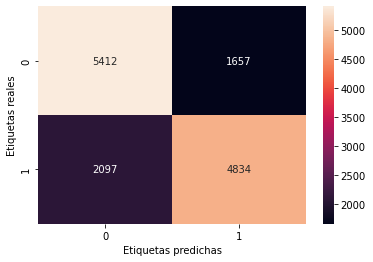

In [174]:
rf_grid = RandomForestClassifier(random_state = 123)
folds=StratifiedKFold(n_splits=5, random_state=12, shuffle=True)
params_reg_log = {'n_estimators': [90, 100, 150, 200],
                  'n_jobs': [1, -1],
                  'max_features': [5, 7, 9, 15, 20, 25],
                  'max_depth': [2, 5] }

rf_grid_listo = RandomizedSearchCV(estimator=rf_grid, param_distributions=params_reg_log, scoring='recall', cv=folds, n_jobs=4, random_state=12)

rf_grid_listo.fit(X_train, y_train)

y_pred_rf_grid = rf_grid_listo.predict(X_test)

# Graficamos la matriz de confusión en train 
sns.heatmap(confusion_matrix(y_test, y_pred_rf_grid), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

print('Accuracy en test =', accuracy_score(y_test, y_pred_rf_grid))
print('Recall en test =', recall_score(y_test, y_pred_rf_grid))

# Grabado del modelo

In [175]:
# # Grabamos el modelo en el directorio
# pkl_filename = "cardio_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(modelo_produccion, file)

# ROC después de RF

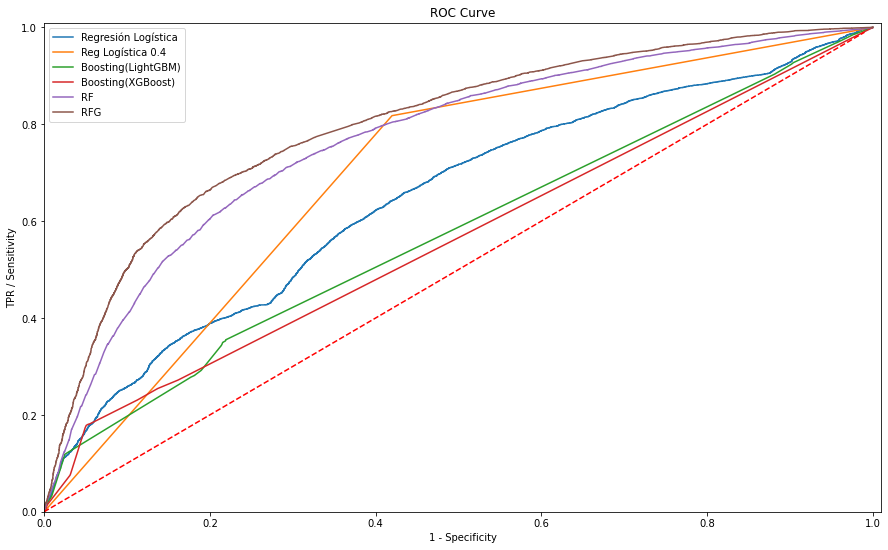

In [176]:
y_pred_proba_reg_log = rs_reg_log.predict_proba(X_test) #lg2: modelo regresión logística entrenado e instanciado previamente
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba_reg_log[:,1])

y_pred_logit = binarize(y_pred_proba, threshold=0.4) #log con umbral 0.4 modelo regresión logística entrenado e instanciado previamente
fpr_lg2,tpr_lg2,thr_lg2 = roc_curve(y_test, y_pred_logit[:,1])

y_pred_proba_BoostingL = grid_lgb.predict_proba(X_test) #model: modelo Boosting(LightGBM) entrenado e instanciado previamente
fpr_BL,tpr_BL,thr_BL = roc_curve(y_test, y_pred_proba_BoostingL[:,1])

y_pred_proba_BoostingX= xgb.predict_proba(X_test) #model: modelo Boosting(XGBoost) entrenado e instanciado previamente
fpr_BX,tpr_BX,thr_BX = roc_curve(y_test, y_pred_proba_BoostingX[:,1])

y_pred_proba_RF = clf.predict_proba(X_test) #gnb: modelo Random Forest entrenado e instanciado previamente
fpr_clf,tpr_clf,thr_clf = roc_curve(y_test, y_pred_proba_RF[:,1])

y_pred_rf_grid_ok = rf_grid_listo.predict_proba(X_test) #gnb: modelo Random Forest entrenado e instanciado previamente con grid
fpr_clfg,tpr_clfg,thr_clfg = roc_curve(y_test, y_pred_rf_grid_ok[:,1])

plt.figure(figsize = (15,9))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificity')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_lg2,tpr_lg2)
plt.plot(fpr_BL,tpr_BL)
plt.plot(fpr_BX,tpr_BX)
plt.plot(fpr_clf,tpr_clf)
plt.plot(fpr_clfg,tpr_clfg)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01),'--r')
plt.legend(['Regresión Logística', 'Reg Logística 0.4', "Boosting(LightGBM)", "Boosting(XGBoost)", "RF", "RFG"])
plt.show()


In [177]:
print('AUC-RL=', auc(fpr_log,tpr_log))
print('AUC-RL0.4=', auc(fpr_lg2,tpr_lg2))
print('AUC-BL=', auc(fpr_BL,tpr_BL))
print('AUC-BX=', auc(fpr_BX,tpr_BX))
print('AUC-RF=', auc(fpr_clf,tpr_clf))

AUC-RL= 0.6448581157038544
AUC-RL0.4= 0.6989569231410424
AUC-BL= 0.5746322413081808
AUC-BX= 0.5619786036761655
AUC-RF= 0.7676627620900063
